In [9]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [10]:
Data  = pd.read_csv("level_2_Input/train.csv", skiprows=1, header=None)

Images = Data[:Data.shape[0]//2]
Images = np.array(Images, dtype='float')


Labels=Data[0][(Data.shape[0]//2):Data.shape[0]]
Labels = np.array(Labels, dtype='int')

print(Data.shape)

(11200, 2352)


In [11]:
Data_Test  = pd.read_csv("level_2_Input/level_2_2.csv", skiprows=1, header=None)

Data_Test = Data_Test[:Data_Test.shape[0]]
Data_Test = np.array(Data_Test, dtype='float')

print(Data_Test.shape)

(3000, 2352)


In [12]:
num_classes = 2
input_shape = (28,84, 1)

x_train = Images.copy()
y_train = np.array(Labels)
x_test = Data_Test.copy()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = tf.reshape(x_train,[-1,28,84])
x_test = tf.reshape(x_test,[-1,28,84])
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

y_train = keras.utils.to_categorical(y_train, num_classes)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

print(y_train.shape)

x_train shape: (5600, 28, 84, 1)
5600 train samples
3000 test samples
(5600, 2)


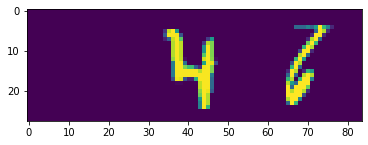

In [13]:
import matplotlib.pyplot as plt

plt.imshow(x_train[3000])

In [14]:
inp = keras.Input(shape=input_shape)


x = layers.Conv2D(8, kernel_size=(3, 3), activation="relu", padding="same")(inp)
xc = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(16, kernel_size=(3, 3), activation="relu", padding="same")(xc)
x = layers.Conv2D(16, kernel_size=(3, 3), activation="relu", padding="same")(x)
x = x+layers.Conv2D(16, kernel_size=(1, 1), padding="same")(xc)
xc = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(xc)
x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(x)
x = x+layers.Conv2D(32, kernel_size=(1, 1), padding="same")(xc)
xc = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(xc)
x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(x)
x = x+layers.Conv2D(32, kernel_size=(1, 1), padding="same")(xc)
xc = layers.MaxPooling2D(pool_size=(1, 2))(x)
x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")(xc)
x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")(x)
x = x+layers.Conv2D(64, kernel_size=(1, 1), padding="same")(xc)
x = layers.Flatten()(x)

x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.75)(x)

out = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inp, out)

model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 84, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 28, 84, 8)    80          input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 14, 42, 8)    0           conv2d_13[0][0]                  
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 14, 42, 16)   1168        max_pooling2d_4[0][0]            
_______________________________________________________________________________________

In [16]:
batch_size = 32

epochs = 30
Check = keras.callbacks.ModelCheckpoint(
    "best.h5", monitor='val_accuracy', verbose=2, save_best_only=True,
    save_weights_only=True, mode='max', save_freq='epoch',
)

Plateau = keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=0.1, patience=3)


model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.003), metrics=["accuracy"])

model.fit(x_train, tf.math.argmax(y_train, -1), batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=[Check, Plateau])

Epoch 1/30
139/140 [============================>.] - ETA: 0s - loss: 0.2101 - accuracy: 0.9029
Epoch 00001: val_accuracy improved from -inf to 0.81161, saving model to best.h5
140/140 [==============================] - 5s 39ms/step - loss: 0.2106 - accuracy: 0.9025 - val_loss: 0.4261 - val_accuracy: 0.8116
Epoch 2/30
139/140 [============================>.] - ETA: 0s - loss: 0.1926 - accuracy: 0.9218
Epoch 00002: val_accuracy improved from 0.81161 to 0.86964, saving model to best.h5
140/140 [==============================] - 5s 38ms/step - loss: 0.1931 - accuracy: 0.9217 - val_loss: 0.4096 - val_accuracy: 0.8696
Epoch 3/30
139/140 [============================>.] - ETA: 0s - loss: 0.1387 - accuracy: 0.9510
Epoch 00003: val_accuracy did not improve from 0.86964
140/140 [==============================] - 5s 36ms/step - loss: 0.1383 - accuracy: 0.9511 - val_loss: 0.4904 - val_accuracy: 0.8420
Epoch 4/30
139/140 [============================>.] - ETA: 0s - loss: 0.1063 - accuracy: 0.9604


In [17]:
model.load_weights("best.h5")

y_hat = model.predict(x_test)
rounded = tf.cast(tf.math.round(y_hat), tf.int32)
np.savetxt("level_2_output/level_2_2_Result.csv", rounded, fmt='%i', delimiter="\n", )
